In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle/kaggle.json"

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [3]:
%cd "/content/drive/MyDrive/Kaggle"

/content/drive/MyDrive/Kaggle


In [4]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 97% 414M/428M [00:03<00:00, 116MB/s]
100% 428M/428M [00:03<00:00, 130MB/s]


In [7]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

# Import Modules

In [10]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

Download link: https://www.kaggle.com/dmitrybabko/speech-emotion-recognition-en

# Load the Dataset

In [13]:
# Load the Dataset 

paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Kaggle/TESS Toronto emotional speech set data/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [14]:
len(paths)

2800

In [15]:
paths[:5]

['/content/drive/MyDrive/Kaggle/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav',
 '/content/drive/MyDrive/Kaggle/TESS Toronto emotional speech set data/OAF_Fear/OAF_bar_fear.wav',
 '/content/drive/MyDrive/Kaggle/TESS Toronto emotional speech set data/OAF_Fear/OAF_base_fear.wav',
 '/content/drive/MyDrive/Kaggle/TESS Toronto emotional speech set data/OAF_Fear/OAF_bath_fear.wav',
 '/content/drive/MyDrive/Kaggle/TESS Toronto emotional speech set data/OAF_Fear/OAF_bean_fear.wav']

In [16]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [17]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/content/drive/MyDrive/Kaggle/TESS Toronto emo...,fear
1,/content/drive/MyDrive/Kaggle/TESS Toronto emo...,fear
2,/content/drive/MyDrive/Kaggle/TESS Toronto emo...,fear
3,/content/drive/MyDrive/Kaggle/TESS Toronto emo...,fear
4,/content/drive/MyDrive/Kaggle/TESS Toronto emo...,fear


In [18]:
df['label'].value_counts()

fear       400
ps         400
sad        400
angry      400
disgust    400
happy      400
neutral    400
Name: label, dtype: int64

# Exploratory Data Analysis

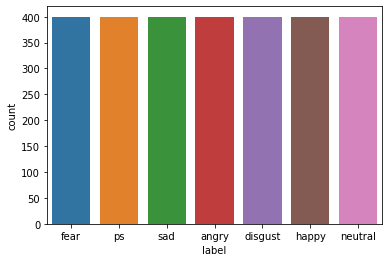

In [19]:
sns.countplot(df['label'])

In [20]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

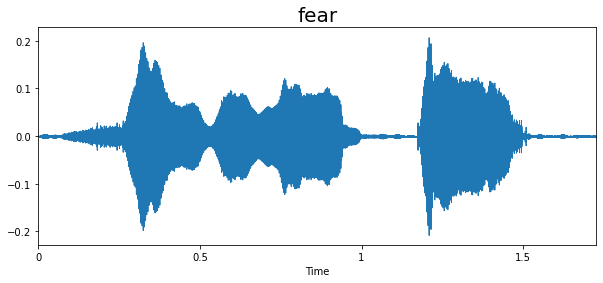

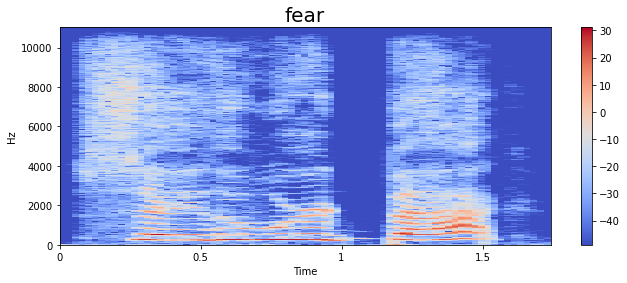

In [21]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

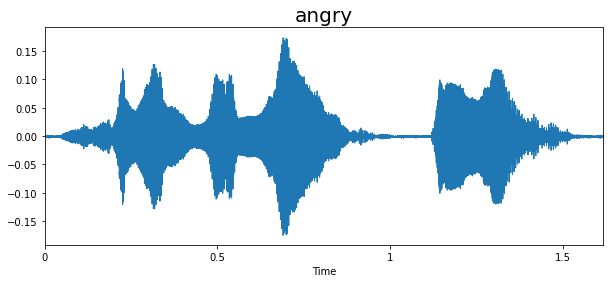

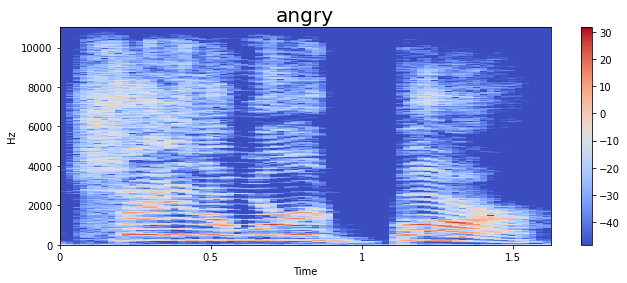

In [22]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

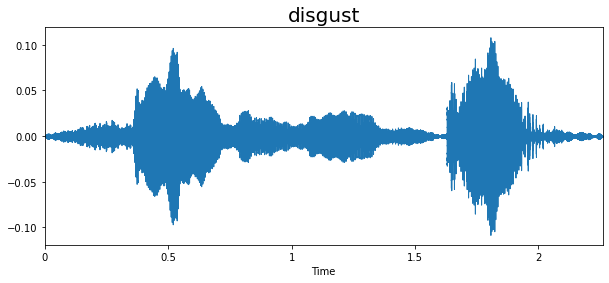

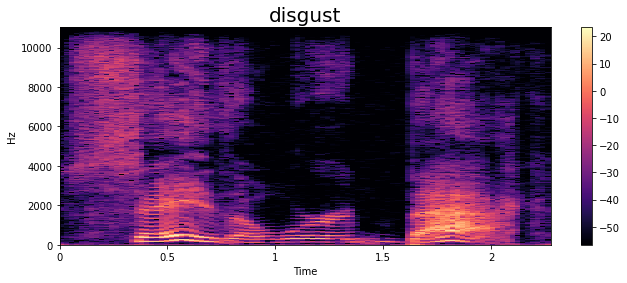

In [23]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

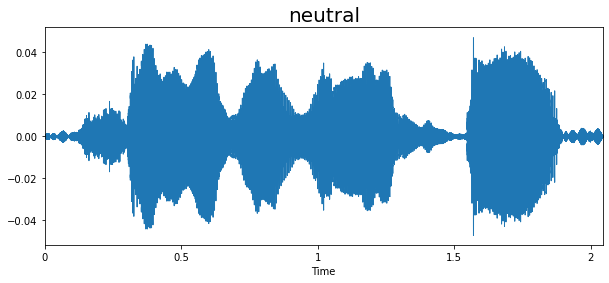

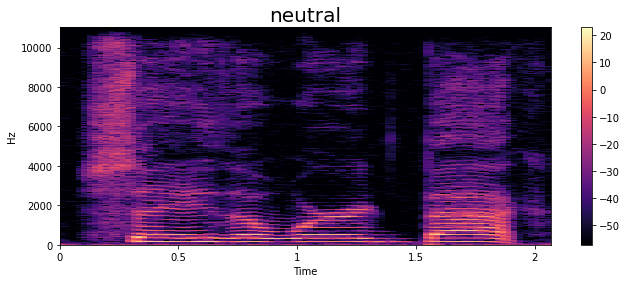

In [24]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

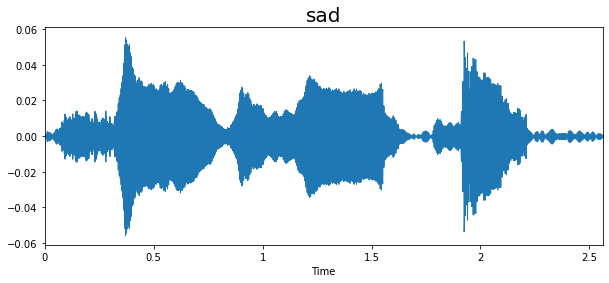

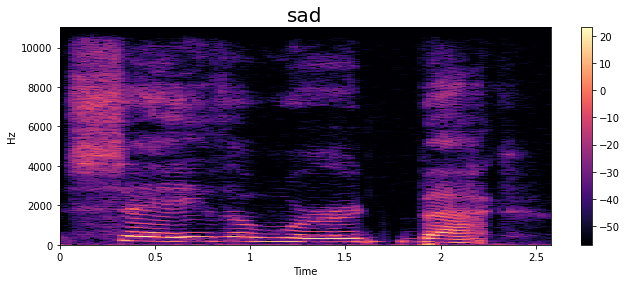

In [25]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

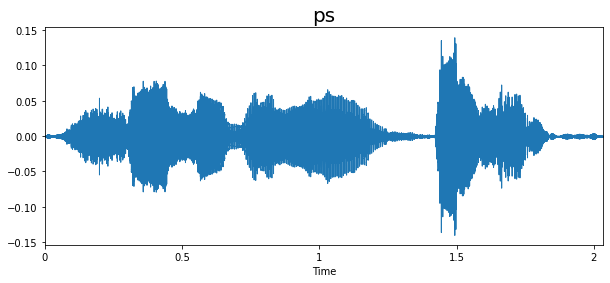

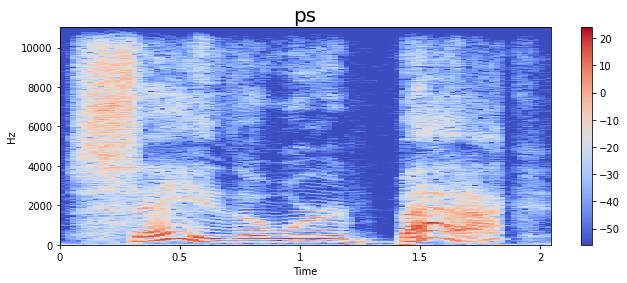

In [26]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

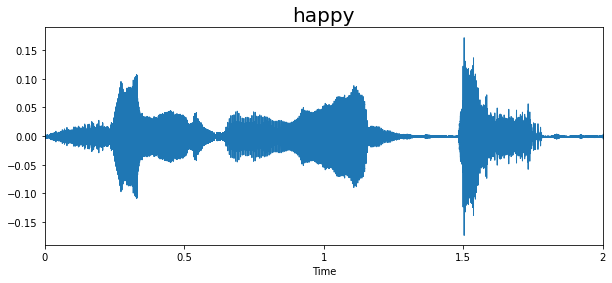

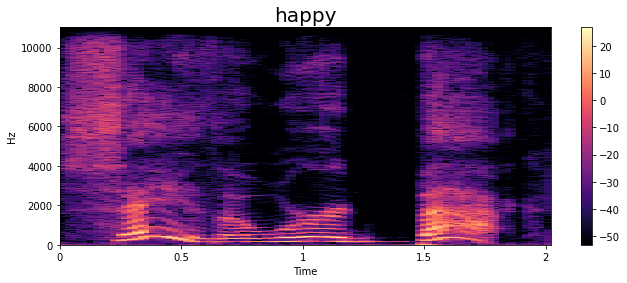

In [27]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

In [28]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [29]:
extract_mfcc(df['speech'][0])

array([-4.4749503e+02,  9.1554199e+01, -3.9023107e-01, -1.7291504e+01,
        2.7826221e+00,  4.7178411e+00, -1.3548040e+01,  5.5741847e-01,
       -1.0805155e+01,  3.2483773e+00, -1.2746214e+01, -6.6335969e+00,
       -6.7705779e+00, -2.3902595e+00, -2.9169650e+00,  2.4589036e+00,
       -7.8448510e+00,  2.7039781e+00,  3.2153213e+00, -7.2382531e+00,
        5.6720991e+00,  1.8850632e+01,  1.4558587e+01,  2.9805136e+01,
        2.1194979e+01,  1.8110538e+01,  7.4543090e+00,  3.3440521e+00,
       -2.7450316e+00,  6.3023968e+00,  5.3630378e-02,  2.4252005e+00,
       -2.8612256e+00, -4.4852743e+00,  6.1673033e-01,  3.2275515e+00,
       -3.1178606e+00, -1.2512102e+00, -2.2621224e+00,  2.0872295e+00],
      dtype=float32)

In [30]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [31]:
X_mfcc

0       [-447.49503, 91.5542, -0.39023107, -17.291504,...
1       [-455.84607, 96.20423, 17.465084, -33.154514, ...
2       [-463.17358, 56.841503, 13.854641, 3.3629608, ...
3       [-412.1985, 86.34686, 7.0555377, -20.730373, -...
4       [-499.56274, 73.1605, 24.567032, 9.044855, 11....
                              ...                        
2795    [-407.44086, 80.76827, 32.582256, 48.33217, -2...
2796    [-426.49484, 103.24961, 24.23312, 43.52783, 4....
2797    [-379.24408, 80.73768, 35.84274, 41.01856, -5....
2798    [-434.53262, 90.57007, 27.83811, 39.918865, -3...
2799    [-422.2284, 71.489845, 31.928364, 46.721912, 4...
Name: speech, Length: 2800, dtype: object

In [32]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [33]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [34]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [35]:
y = y.toarray()

In [36]:
y.shape

(2800, 7)

# Create the LSTM Model

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [38]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 10s 222ms/step - loss: 1.1613 - accuracy: 0.5540 - val_loss: 2.1062 - val_accuracy: 0.3036
Epoch 2/50
35/35 [==============================] - 7s 207ms/step - loss: 0.4367 - accuracy: 0.8433 - val_loss: 2.1165 - val_accuracy: 0.3500
Epoch 3/50
35/35 [==============================] - 7s 201ms/step - loss: 0.2621 - accuracy: 0.9147 - val_loss: 1.9915 - val_accuracy: 0.4696
Epoch 4/50
35/35 [==============================] - 7s 196ms/step - loss: 0.2128 - accuracy: 0.9375 - val_loss: 2.6715 - val_accuracy: 0.4214
Epoch 5/50
35/35 [==============================] - 7s 197ms/step - loss: 0.1698 - accuracy: 0.9478 - val_loss: 2.7182 - val_accuracy: 0.3643
Epoch 6/50
35/35 [==============================] - 7s 198ms/step - loss: 0.1220 - accuracy: 0.9612 - val_loss: 3.3852 - val_accuracy: 0.3714
Epoch 7/50
35/35 [==============================] - 7s 201ms/step - loss: 0.1271 - accuracy: 0.9603 - val_loss: 2.2529 - val_accuracy: 0.4232
Epoch

In [39]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

# Plot the results

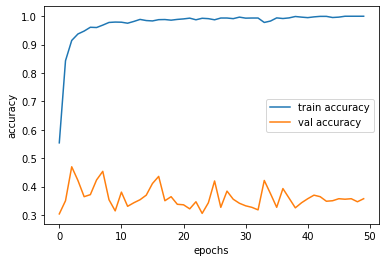

In [40]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

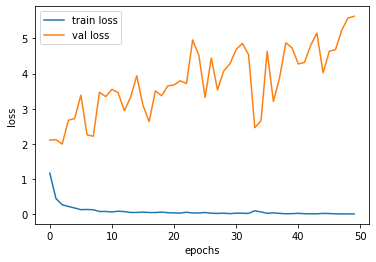

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()